# trends of foreign investors

In [55]:
import pandas as pd
import xlrd
import glob
import plotly.graph_objects as go

In [67]:
#dataフォルダ内のエクセルファイルのpathをfilesに格納 
files = sorted(glob.glob('data/*'))

In [68]:
#2019年10月4週目のエクセルファイルを選択
file = files[-1]

#エクセルファイルを読み込み
wb = xlrd.open_workbook(file)

#エクセルのシート名をすべて読み込む
sheet_names = wb.sheet_names()

#シート名「TSE 1st」（東証１部）のシートを選択
sheet = wb.sheet_by_name(sheet_names[0])

In [69]:
print(sheet.cell(3,0).value)

2020年12月第1週 2020/12 week1  ( 11/30 - 12/4 )


In [70]:
#自己売買、委託売買
def get_proprietary_brokerage(_sheet, _data):
    _data.extend([_sheet.cell(12,8).value,_sheet.cell(13,8).value,_sheet.cell(14,8).value,
                  _sheet.cell(15,8).value, _sheet.cell(16,8).value,_sheet.cell(17,8).value,])
    return _data

#委託売買の内訳
def get_brokerage_trading(_sheet, _data):
    _data.extend([_sheet.cell(23,8).value,_sheet.cell(24,8).value,_sheet.cell(25,8).value,
                  _sheet.cell(26,8).value,_sheet.cell(27,8).value,_sheet.cell(28,8).value,
                  _sheet.cell(29,8).value,_sheet.cell(30,8).value,_sheet.cell(31,8).value,
                  _sheet.cell(32,8).value,_sheet.cell(33,8).value,_sheet.cell(34,8).value])
    return _data

#法人売買の内訳
def get_brokerage_institutions(_sheet, _data):
    _data.extend([_sheet.cell(37,8).value,_sheet.cell(38,8).value,_sheet.cell(39,8).value,
                  _sheet.cell(40,8).value,_sheet.cell(41,8).value,_sheet.cell(42,8).value,
                  _sheet.cell(43,8).value,_sheet.cell(44,8).value,_sheet.cell(45,8).value,
                  _sheet.cell(46,8).value,_sheet.cell(47,8).value,_sheet.cell(48,8).value,])
    return _data

#金融機関売買の内訳
def get_brokerage_financial(_sheet, _data):
    _data.extend([_sheet.cell(51,8).value,_sheet.cell(52,8).value,_sheet.cell(53,8).value,
                  _sheet.cell(54,8).value,_sheet.cell(55,8).value,_sheet.cell(56,8).value,
                  _sheet.cell(57,8).value,_sheet.cell(58,8).value,_sheet.cell(59,8).value,
                  _sheet.cell(60,8).value,_sheet.cell(61,8).value,_sheet.cell(62,8).value,])
    return _data

#個人、自己売買の現金、信用売買
def get_individual_proprietary(_sheet, _data):
    _data.extend([_sheet.cell(67,2).value,_sheet.cell(67,4).value,
                  _sheet.cell(68,2).value,_sheet.cell(68,4).value,
                  _sheet.cell(69,2).value,_sheet.cell(69,4).value,
                  _sheet.cell(70,2).value,_sheet.cell(70,4).value])
    return data
    
#海外投資家の個人法人売買
def get_foreign(_sheet, _data): 
    _data.extend([_sheet.cell(74,3).value,_sheet.cell(74,5).value,
                  _sheet.cell(75,3).value,_sheet.cell(75,5).value])
    return _data

In [71]:
data = []
data = get_proprietary_brokerage(sheet, data)
data = get_brokerage_trading(sheet, data)
data = get_brokerage_institutions(sheet, data)
data = get_brokerage_financial(sheet, data)
data = get_individual_proprietary(sheet, data)
data = get_foreign(sheet, data)

In [72]:
cols = [
    'proprietary_sales', 'proprietary_purchases','proprietary_total',
    'brokerage_sales', 'brokerage_purchases','brokerage_total',

    'brokerage_inst_sales', 'brokerage_inst_purchases','brokerage_inst_total',
    'brokerage_ind_sales', 'brokerage_ind_purchases','brokerage_ind_total',
    'brokerage_fore_sales', 'brokerage_fore_purchases','brokerage_fore_total',
    'brokerage_sec_sales', 'brokerage_sec_purchases','brokerage_sec_total',

    'brokerage_inv_sales', 'brokerage_inv_purchases','brokerage_inv_total',
    'brokerage_bus_sales', 'brokerage_bus_purchases','brokerage_bus_total',
    'brokerage_oth_sales', 'brokerage_oth_purchases','brokerage_oth_total',
    'brokerage_fin_sales', 'brokerage_fin_purchases','brokerage_fin_total',

    'brokerage_life_sales', 'brokerage_life_purchases','brokerage_life_total',
    'brokerage_citybk_sales', 'brokerage_citybk_purchases','brokerage_citybk_total',
    'brokerage_trustbk_sales', 'brokerage_trustbk_purchases','brokerage_trustbk_total',
    'brokerage_othfin_sales', 'brokerage_othfin_purchases','brokerage_othfin_total',

    'brokerage_indcash_sales', 'brokerage_indcash_purchases',
    'brokerage_indmargin_sales', 'brokerage_indmargin_purchases',    
    'proprietary_cash_sales', 'proprietary_cash_purchases',
    'proprietary_margin_sales', 'proprietary_margin_purchases',

    'brokerage_foreinst_sales', 'brokerage_foreinst_purchases',
    'brokerage_foreind_sales', 'brokerage_foreind_purchases']

#データフレーム作成
df = pd.DataFrame(columns = cols)
for j in range(len(df.columns)):
    df.loc[0, df.columns[j]] = data[j]

#データフレームのデータを数値に変換
for c in df:
    df[c] = df[c].str.replace(',','')
    df[c] = df[c].astype(float)

In [73]:
df

,proprietary_sales,proprietary_purchases,proprietary_total,brokerage_sales,brokerage_purchases,brokerage_total,brokerage_inst_sales,brokerage_inst_purchases,brokerage_inst_total,brokerage_ind_sales,...,brokerage_indmargin_sales,brokerage_indmargin_purchases,proprietary_cash_sales,proprietary_cash_purchases,proprietary_margin_sales,proprietary_margin_purchases,brokerage_foreinst_sales,brokerage_foreinst_purchases,brokerage_foreind_sales,brokerage_foreind_purchases
0,1461466.0,1260646.0,2722112.0,7542394.0,7771993.0,15314387.0,815112.0,832934.0,1648046.0,1402300.0,...,725116.0,848447.0,1381899.0,1260615.0,79567.0,31.0,5247671.0,5340512.0,7981.0,8848.0


# 全データをデータフレーム化

In [74]:
def get_weeks(_file, _weeks):
    _weeks.append('20' + file[-10:-6] + '-' + file[-6:-4])
    return _weeks

weeks = []
weeks = get_weeks(file, weeks)
print(weeks)

#>> ['201910-04']

['202012-01']


In [75]:
cols = [
    'proprietary_sales', 'proprietary_purchases','proprietary_total',
    'brokerage_sales', 'brokerage_purchases','brokerage_total',

    'brokerage_inst_sales', 'brokerage_inst_purchases','brokerage_inst_total',
    'brokerage_ind_sales', 'brokerage_ind_purchases','brokerage_ind_total',
    'brokerage_fore_sales', 'brokerage_fore_purchases','brokerage_fore_total',
    'brokerage_sec_sales', 'brokerage_sec_purchases','brokerage_sec_total',

    'brokerage_inv_sales', 'brokerage_inv_purchases','brokerage_inv_total',
    'brokerage_bus_sales', 'brokerage_bus_purchases','brokerage_bus_total',
    'brokerage_oth_sales', 'brokerage_oth_purchases','brokerage_oth_total',
    'brokerage_fin_sales', 'brokerage_fin_purchases','brokerage_fin_total',

    'brokerage_life_sales', 'brokerage_life_purchases','brokerage_life_total',
    'brokerage_citybk_sales', 'brokerage_citybk_purchases','brokerage_citybk_total',
    'brokerage_trustbk_sales', 'brokerage_trustbk_purchases','brokerage_trustbk_total',
    'brokerage_othfin_sales', 'brokerage_othfin_purchases','brokerage_othfin_total',

    'brokerage_indcash_sales', 'brokerage_indcash_purchases',
    'brokerage_indmargin_sales', 'brokerage_indmargin_purchases',    
    'proprietary_cash_sales', 'proprietary_cash_purchases',
    'proprietary_margin_sales', 'proprietary_margin_purchases',

    'brokerage_foreinst_sales', 'brokerage_foreinst_purchases',
    'brokerage_foreind_sales', 'brokerage_foreind_purchases'
     ]

#データフレームの作成
df = pd.DataFrame(columns = cols)

weeks = []
for i in range(len(files)):
    file = files[i]
    wb = xlrd.open_workbook(file)
    sheet_names = wb.sheet_names()
    sheet = wb.sheet_by_name(sheet_names[0])
    
    #週情報の取得
    weeks = get_weeks(file, weeks)
    
    #エクセル内のデータの取得
    data = []
    data = get_proprietary_brokerage(sheet, data)
    data = get_brokerage_trading(sheet, data)
    data = get_brokerage_institutions(sheet, data)
    data = get_brokerage_financial(sheet, data)
    data = get_individual_proprietary(sheet, data)
    data = get_foreign(sheet, data)
    
    for j in range(len(df.columns)):
        df.loc[i, df.columns[j]] = data[j]

#テキストデータの数値化
for c in df:
    df[c] = df[c].str.replace(',','')
    df[c] = df[c].astype(float)

# 委託売買金額の推移  
委託売買の法人、個人、外国人投資家、証券会社の売買代金のtotal値の可視化

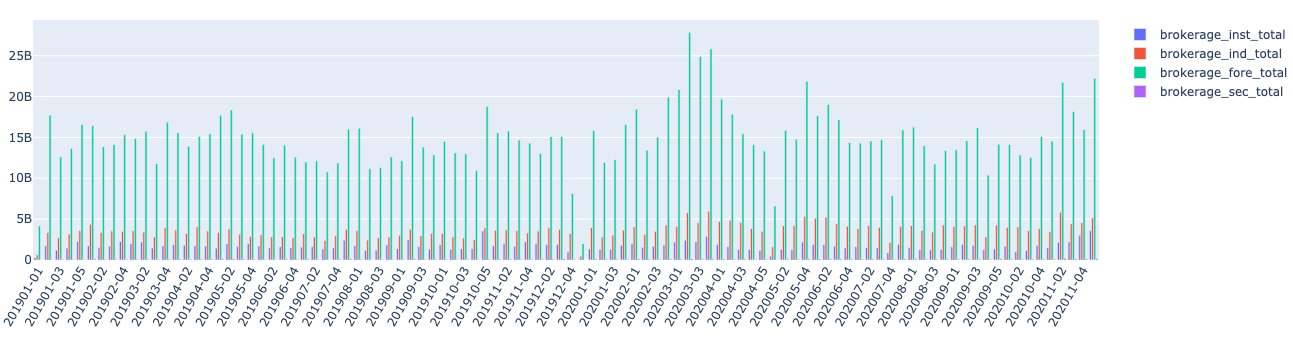

In [76]:
fig = go.Figure(
    data = [
        go.Bar(x = weeks, y = df['brokerage_inst_total'], name = 'brokerage_inst_total'),
        go.Bar(x = weeks, y = df['brokerage_ind_total'], name = 'brokerage_ind_total'),
        go.Bar(x = weeks, y = df['brokerage_fore_total'], name = 'brokerage_fore_total'),
        go.Bar(x = weeks, y = df['brokerage_sec_total'], name = 'brokerage_sec_total')
    ],
    layout = go.Layout(
        xaxis = dict(showgrid=False, tickangle=-60),
        margin=dict(l=0, r=20, t=20, b=100, autoexpand=True), height=300, width=1000)
)
fig.update_layout(barmode='group')
fig.show()

# 外国人投資家の売買動向の推移

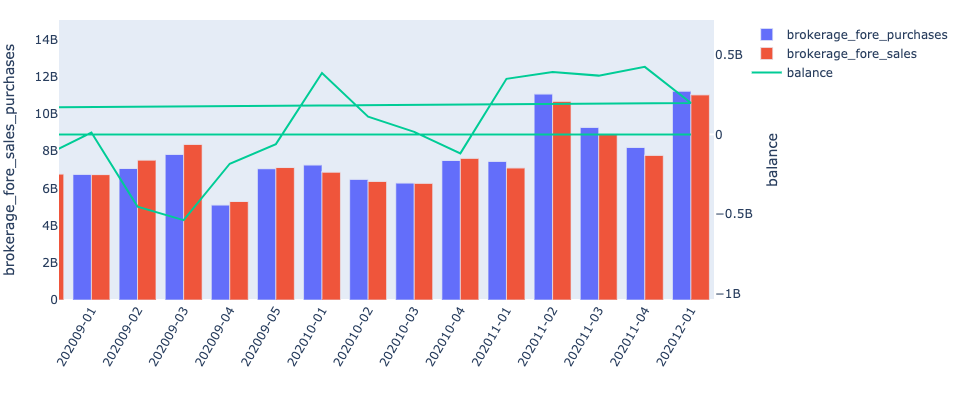

In [77]:
fig = go.Figure(
    data = [
        go.Bar(x = weeks, y = df['brokerage_fore_purchases'], name = 'brokerage_fore_purchases',yaxis='y1'),
        go.Bar(x = weeks, y = df['brokerage_fore_sales'], name = 'brokerage_fore_sales',yaxis='y1'),
        go.Scatter(x = weeks, y = df['brokerage_fore_purchases'] - df['brokerage_fore_sales'] , name = 'balance', yaxis='y2')
        #go.Scatter(x = weeks, y = df['brokerage_fore_purchases'] - df['brokerage_fore_sales'] , name = 'balance',  yaxis='y2')
    ],
    layout = go.Layout(
        xaxis = dict(showgrid=False, tickangle=-60),
        yaxis = dict(title = 'brokerage_fore_sales_purchases', side = 'left', showgrid=False),
        yaxis2 = dict(title = 'balance', side = 'right',showgrid=False, overlaying = 'y'),
        margin=dict(l=20, r=10, t=20, b=100, autoexpand=True),
        legend=dict(x=1.05, xanchor='left', y=1, yanchor='auto'),
        height=400,
        width=1000)
)
fig.update_layout(barmode='group')
fig.show()